<a href="https://colab.research.google.com/github/AymanBard/MachineLearningOption/blob/main/%5B02%5D_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La régression linéaire : solution en forme close et descente de gradient

## Données
On commence par générer des données. Les données en entrée seront dans $\mathbb{R}$, et pour chaque point $x_i \in \mathbb{R}$, il faudra prédire un $y_i \in \mathbb{R}$.

In [ ]:
import numpy as np
nb_points = 30
true_w = -.8
true_b = .5
data_x = np.random.rand(nb_points, 1)
data_y = data_x * true_w + true_b + np.random.randn(nb_points, 1) * .1

In [ ]:
print('données en entrée\n', data_x)
print('données à prédire\n', data_y)

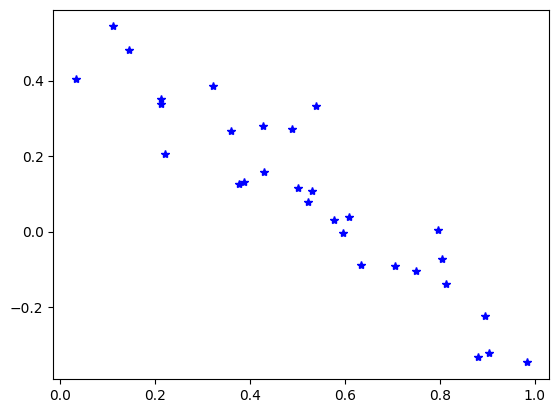

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data_x, data_y, '*b')
plt.show()

In [ ]:
w = np.random.randn()
b = np.random.randn()

## Visualisation du modèle

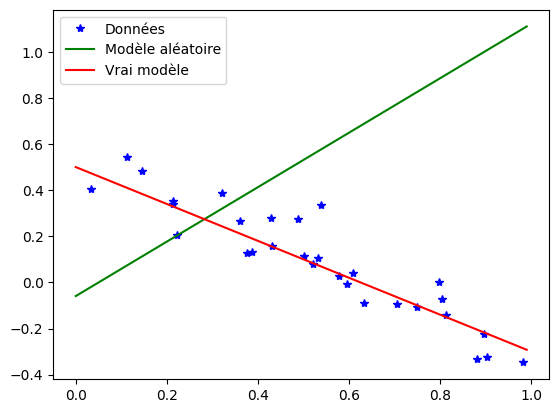

In [ ]:
plt.plot(data_x, data_y, '*b')
o = np.arange(0, 1, .01)
a = w * o + b
plt.plot(o, a, '-g')
true_a = true_w * o + true_b
plt.plot(o, true_a, '-r')
plt.legend(['Données', 'Modèle aléatoire', 'Vrai modèle'])
plt.show()

# Exercices

## 1
Calculer l'Erreur Quadratique Moyenne (EQM) du modèle $\frac{1}{K}∑_{i=0}^{K-1} (\hat{y_i} - y_i)^2$ où $\hat{y_i} = w x_i + b$

## 2
Trouver `w_opt` et `b_opt` qui minimisent l'EQM. S'assurer que l'EQM de ce modèle est inférieure à l'EQM du modèle aléatoire calculé en 1, et vérifier que le gradient de l'EQM est nul en `(w_opt, b_opt)`



In [ ]:
Z = np.ones((nb_points, 2))
print(Z)

In [ ]:
Z.T @ Z

array([[30., 30.],
       [30., 30.]])

## 3
Soit les nouvelles données `data_x_test`. Calculer la prédiction de votre modèle pour ces données et afficher graphiquement les données, les prédictions et le modèle ayant généré les données initiales

In [ ]:
nb_points_test = 10
data_x_test = np.random.rand(nb_points_test, 1)

## 4

Calculer la dérivée de l'EQM par rapport à `w` et `b` (sur papier)

## 5
Coder l'algorithme de descente de gradient pour la régression linéaire. Comparer le modèle obtenu avec la solution en forme close